In [1]:
install.packages("tree")
library(tree)
set.seed(123)
setwd("C:/Users/JunHau96/Documents/PM_Assignment")
kd_cleaned = read.csv("cleaned_csv_result-chronic_kidney_disease_full.csv")

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JunHau96\AppData\Local\Temp\RtmpusJ7jU\downloaded_packages


Warning message:
"package 'tree' was built under R version 3.6.3"

In [2]:
data1 = sort(sample(nrow(kd_cleaned), nrow(kd_cleaned)*.7))
#creating training data set by selecting the output row values
kd_train=kd_cleaned[data1,]

#creating test data set by not selecting the output row values
kd_test=kd_cleaned[-data1,]

tree_train=kd_train
tree_test=kd_test


In [3]:
str(kd_train)

'data.frame':	280 obs. of  22 variables:
 $ X       : int  2 4 5 7 9 10 11 13 14 16 ...
 $ X.age.  : int  7 48 51 68 52 53 50 68 68 40 ...
 $ X.bp.   : int  50 70 80 70 100 90 60 70 70 80 ...
 $ X.sg.   : num  1.02 1 1.01 1.01 1.01 ...
 $ X.al.   : int  4 4 2 0 3 2 2 3 3 3 ...
 $ X.su.   : int  0 0 0 0 0 0 4 1 0 0 ...
 $ X.pc.   : int  1 0 1 1 0 0 0 1 1 1 ...
 $ X.pcc.  : int  0 1 0 0 1 1 1 1 0 0 ...
 $ X.ba.   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X.bgr.  : int  99 117 106 100 138 70 490 208 98 76 ...
 $ X.bu.   : num  18 56 26 54 60 107 55 72 86 162 ...
 $ sc.     : num  0.8 3.8 1.4 24 1.9 7.2 4 2.1 4.6 9.6 ...
 $ X.sod.  : num  135 111 135 104 135 114 135 138 135 141 ...
 $ X.hemo. : num  11.3 11.2 11.6 12.4 10.8 9.5 9.4 9.7 9.8 7.6 ...
 $ X.pcv.  : int  38 32 35 36 33 29 28 28 52 24 ...
 $ X.htn.  : int  0 1 0 0 1 1 1 1 1 1 ...
 $ X.dm.   : int  0 0 0 0 1 1 1 1 1 0 ...
 $ X.cad.  : int  0 0 0 0 0 0 0 1 1 0 ...
 $ X.appet.: int  1 0 1 1 1 0 1 0 0 1 ...
 $ X.pe.   : int  0 1 0 0 0 0 0 1 

In [4]:
tree.model=tree(X.class.~.-X,data=tree_train,control=tree.control(nobs=nrow(kd_train),minsize=1))

In [5]:
print(tree.model)

node), split, n, deviance, yval
      * denotes terminal node

 1) root 280 66.790 0.607100  
   2) sc. < 1.25 144 25.970 0.236100  
     4) X.sg. < 1.0175 25  0.000 1.000000 *
     5) X.sg. > 1.0175 119  8.319 0.075630  
      10) X.hemo. < 12.85 7  0.000 1.000000 *
      11) X.hemo. > 12.85 112  1.964 0.017860  
        22) X.age. < 10 1  0.000 1.000000 *
        23) X.age. > 10 111  0.991 0.009009  
          46) X.su. < 1 110  0.000 0.000000 *
          47) X.su. > 1 1  0.000 1.000000 *
   3) sc. > 1.25 136  0.000 1.000000 *


In [6]:
summary(tree.model)


Regression tree:
tree(formula = X.class. ~ . - X, data = tree_train, control = tree.control(nobs = nrow(kd_train), 
    minsize = 1))
Variables actually used in tree construction:
[1] "sc."     "X.sg."   "X.hemo." "X.age."  "X.su."  
Number of terminal nodes:  6 
Residual mean deviance:  0 = 0 / 274 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 280 66.790 0.607100  
   2) sc. < 1.25 144 25.970 0.236100  
     4) X.sg. < 1.0175 25  0.000 1.000000 *
     5) X.sg. > 1.0175 119  8.319 0.075630  
      10) X.hemo. < 12.85 7  0.000 1.000000 *
      11) X.hemo. > 12.85 112  1.964 0.017860  
        22) X.age. < 10 1  0.000 1.000000 *
        23) X.age. > 10 111  0.991 0.009009  
          46) X.su. < 1 110  0.000 0.000000 *
          47) X.su. > 1 1  0.000 1.000000 *
   3) sc. > 1.25 136  0.000 1.000000 *

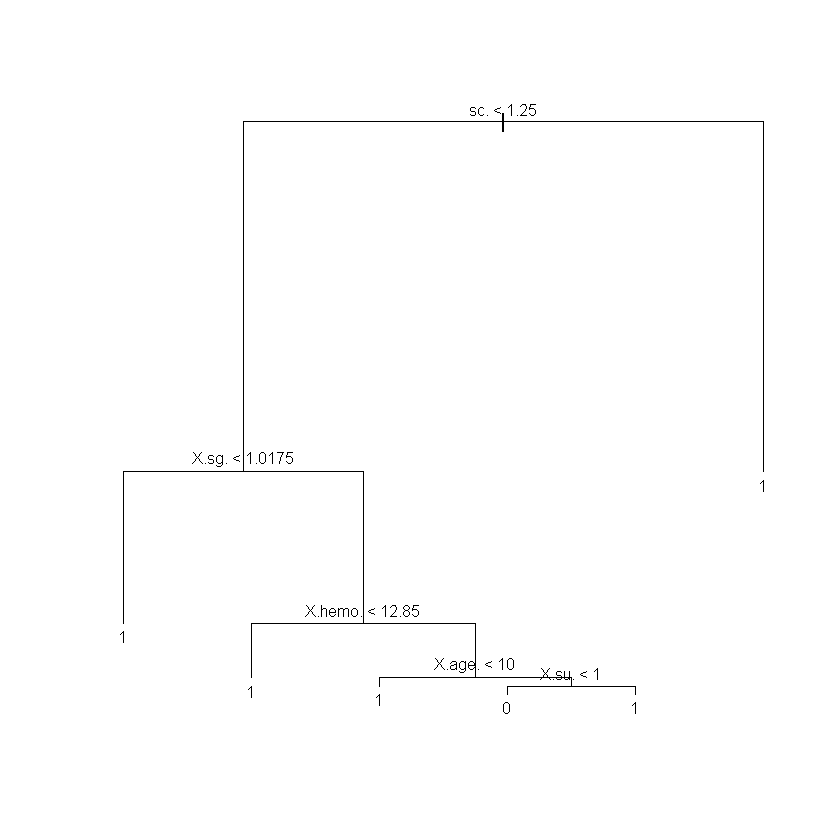

In [7]:
plot(tree.model)
text(tree.model,cex=0.8)
tree.model

In [8]:
tree.pred = predict(tree.model, tree_test)

In [9]:
tree.table=table(tree.pred,tree_test$X.class.)
tree.table

         
tree.pred  0  1
        0 40  3
        1  0 77

In [10]:
performance = function(tab, desc="Confusion matrix and perfomance for Decision Tree"){
    cat(desc,"\n")
    ACR = sum(diag(tab))/sum(tab)
    TPR = tab[1,1]/sum(tab[,1]); TNR = tab[2,2]/sum(tab[,2])
    PPV = tab[1,1]/sum(tab[1,]); NPV = tab[2,2]/sum(tab[2,])
    FPR = 1 - TNR                ; FNR = 1 - TPR
    RandomAccuracy = (sum(tab[,2])*sum(tab[2,]) + sum(tab[,1])*sum(tab[1,]))/(sum(tab)^2)
    Kappa = (ACR - RandomAccuracy)/(1 - RandomAccuracy)
    print(tab)
    cat("\n      Accuracy :", ACR, "\n\n         Kappa :", Kappa, "\n")
    cat("\n   Sensitivity :", TPR,   "\n   Specificity :", TNR, "\n")
    cat("Pos Pred Value :", PPV,     "\nNeg Pred Value :", NPV, "\n")
    cat("           FPR :", FPR,     "\n           FNR :", FNR, "\n")
}

In [11]:
performance(tree.table)

Confusion matrix and perfomance for Decision Tree 
         
tree.pred  0  1
        0 40  3
        1  0 77

      Accuracy : 0.975 

         Kappa : 0.9447853 

   Sensitivity : 1 
   Specificity : 0.9625 
Pos Pred Value : 0.9302326 
Neg Pred Value : 1 
           FPR : 0.0375 
           FNR : 0 


           
tree.d1pred  0  1
          0 40  3
          1  0 77

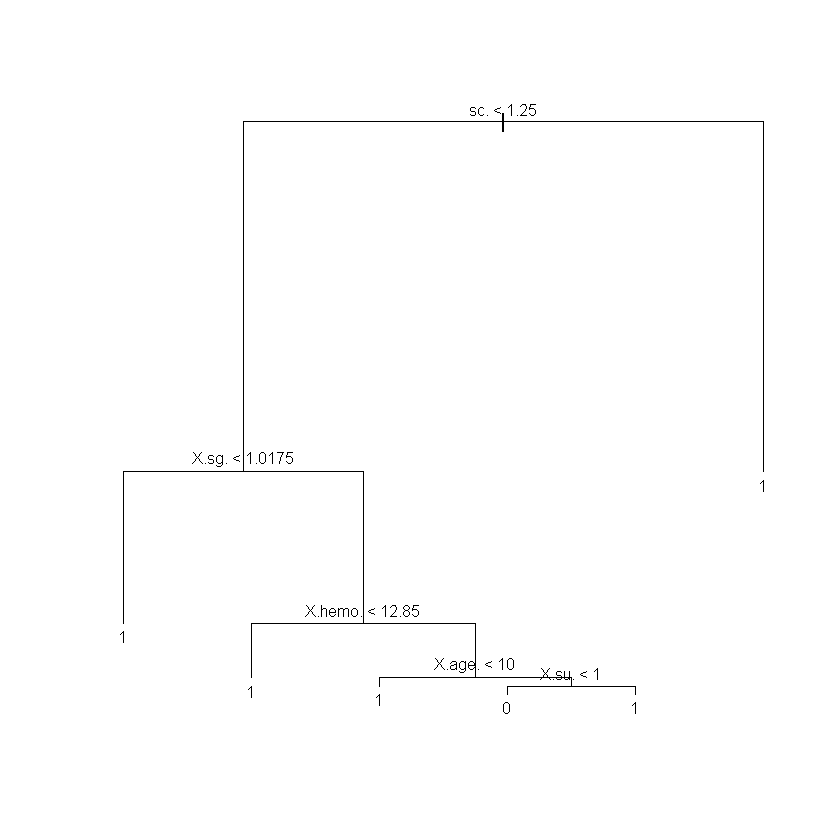

In [27]:
set.seed(123)
prune.d1 = prune.tree(tree.model,best=5) #prune the decision tree with the misclassification rate (model, how large do you want your decision tree to be, best means no of terminal nodes)
plot(prune.d1)
text(prune.d1,cex=0.8)
tree.d1pred = predict(prune.d1,tree_test)
table(tree.d1pred,tree_test$X.class.)


In [18]:
row1

NULL

In [19]:
row2

NULL

In [20]:
prune

node), split, n, deviance, yval
      * denotes terminal node

 1) root 280 66.790 0.60710  
   2) sc. < 1.25 144 25.970 0.23610  
     4) X.sg. < 1.0175 25  0.000 1.00000 *
     5) X.sg. > 1.0175 119  8.319 0.07563  
      10) X.hemo. < 12.85 7  0.000 1.00000 *
      11) X.hemo. > 12.85 112  1.964 0.01786 *
   3) sc. > 1.25 136  0.000 1.00000 *